In [67]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import datetime
import numpy as np  
import sys 

   
def __pltOnePlot(title, pos , plotDatas: list,loc_mini:str = 'upper left'):
    '''
    pos: 
        ex: (1,2,1)

    plotDatas:
        ex:
        [
            [[...] ,'--'],
            [[...] ,'-'],
        ]

    loc_mini: 'upper left' or 'upper right'
    '''
    plt.subplot(*pos)
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5')
    xticks_start = 0
    xticks_end = 0
    yticks_start = sys.maxsize
    yticks_end = 0
    
    for datas ,sign in plotDatas:
        xticks_end = max(xticks_end ,len(datas))
        temp = []
        temp.extend(datas)
        temp.append(yticks_end)
        yticks_end = max(temp)
        yticks_start = min(temp)

        plt.plot(datas ,sign)
    
    plt.legend(['train', 'test'], loc=loc_mini)
    plt.xlim([xticks_start,xticks_end])
    plt.ylim([yticks_start,yticks_end])

    plt.xticks([i for i in range(xticks_start ,xticks_end + 1 ,min(5 ,(xticks_start + xticks_end) / 10))]
        ,rotation=90)

    y_range = (yticks_start + yticks_end) / 10
    y_ytick_list = np.arange(yticks_start ,yticks_end - y_range ,y_range)
    y_ytick_list = np.append(y_ytick_list ,yticks_end)
    plt.yticks( y_ytick_list )

def drawTrainProcess(history=None) -> None:
    '''
    將訓練過程用 matplotlib.pyplot 畫成圖表
    :param history  傳入 model.fit() 的回傳值
    '''
    if(history == None):
        return
    plt.figure(figsize = (15,5))
    
    
    __pltOnePlot('loss' ,(1,2,1),
    [
        [history['loss'] ,'-'],
        [history['val_loss'] ,'--'],
    ],loc_mini='upper right')
    __pltOnePlot('accuracy' ,(1,2,2),
    [
        [history['accuracy'] ,'-'],
        [history['val_accuracy'] ,'--'],
    ])
    

    plt.savefig(f'train-progress.jpg')
    plt.show()

    print('drawTrainProcess... Done')

In [68]:
r = {'loss': [2.2255520820617676,
  1.9836751222610474,
  1.8450367450714111,
  1.7410557270050049,
  1.654253602027893,
  1.58892822265625,
  1.5331717729568481,
  1.4870978593826294,
  1.4493645429611206,
  1.4108284711837769,
  1.3802162408828735,
  1.3542932271957397,
  1.32827889919281,
  1.30370032787323,
  1.2827106714248657,
  1.2626243829727173,
  1.244078516960144,
  1.226934790611267,
  1.207912802696228,
  1.1905367374420166,
  1.1807632446289062,
  1.1648192405700684,
  1.1519652605056763,
  1.1404800415039062,
  1.128990650177002,
  1.1163259744644165,
  1.1037863492965698,
  1.0971717834472656,
  1.0851019620895386,
  1.0806281566619873,
  1.0704725980758667,
  1.0634857416152954,
  1.0555565357208252,
  1.0465997457504272,
  1.0391113758087158,
  1.0327526330947876,
  1.0283869504928589,
  1.0188812017440796,
  1.0171078443527222,
  1.0128209590911865,
  1.0082406997680664,
  1.0017788410186768,
  0.9947259426116943,
  0.993959903717041,
  0.9878193140029907,
  0.9846231937408447,
  0.9792601466178894,
  0.9742671847343445,
  0.9749171733856201,
  0.966136634349823,
  0.9671845436096191,
  0.9621134996414185,
  0.9565216898918152,
  0.9540548324584961,
  0.9518837332725525,
  0.9485464096069336,
  0.9481481313705444,
  0.9426143765449524,
  0.9421520829200745,
  0.9388371706008911,
  0.9359895586967468,
  0.9346734285354614,
  0.933167576789856,
  0.9302980303764343,
  0.9274911880493164,
  0.9276650547981262,
  0.9248973727226257,
  0.9232933521270752,
  0.9185832142829895,
  0.918931782245636,
  0.9219011068344116,
  0.9180383682250977,
  0.915907084941864,
  0.9125034213066101,
  0.9108796715736389,
  0.9092468023300171,
  0.9111759662628174,
  0.9075866341590881,
  0.90784752368927,
  0.9074754118919373,
  0.9055429697036743,
  0.9035657048225403,
  0.9029461145401001,
  0.8991992473602295,
  0.9001179933547974,
  0.8965966701507568,
  0.9007503390312195,
  0.8975159525871277,
  0.8953109383583069,
  0.8955141305923462,
  0.8943692445755005,
  0.8945260047912598,
  0.8917626738548279,
  0.8918065428733826,
  0.8915503621101379,
  0.8924499154090881,
  0.8925039172172546,
  0.8890400528907776,
  0.8898583054542542,
  0.889996349811554],
 'accuracy': [0.16777999699115753,
  0.2639400064945221,
  0.3134399950504303,
  0.34973999857902527,
  0.383899986743927,
  0.4090999960899353,
  0.434579998254776,
  0.45118001103401184,
  0.46588000655174255,
  0.4853000044822693,
  0.4949199855327606,
  0.5068600177764893,
  0.5174999833106995,
  0.5270199775695801,
  0.5337799787521362,
  0.5459399819374084,
  0.5493199825286865,
  0.5568600296974182,
  0.5640599727630615,
  0.5730999708175659,
  0.5769799947738647,
  0.5822799801826477,
  0.5872399806976318,
  0.5912799835205078,
  0.5977799892425537,
  0.6014800071716309,
  0.6068800091743469,
  0.6070399880409241,
  0.6133800148963928,
  0.6160600185394287,
  0.6176999807357788,
  0.6223199963569641,
  0.6236600279808044,
  0.6286399960517883,
  0.6306999921798706,
  0.6332600116729736,
  0.6334999799728394,
  0.6370999813079834,
  0.6379200220108032,
  0.6396999955177307,
  0.6420999765396118,
  0.6445199847221375,
  0.6474199891090393,
  0.648140013217926,
  0.650439977645874,
  0.6507400274276733,
  0.6520400047302246,
  0.6540200114250183,
  0.6538199782371521,
  0.6579399704933167,
  0.6574599742889404,
  0.6571800112724304,
  0.6606199741363525,
  0.6617799997329712,
  0.6627600193023682,
  0.6642799973487854,
  0.6641200184822083,
  0.6645399928092957,
  0.6653000116348267,
  0.6690599918365479,
  0.669160008430481,
  0.668720006942749,
  0.6708800196647644,
  0.6729000210762024,
  0.67221999168396,
  0.6724600195884705,
  0.6729400157928467,
  0.6736800074577332,
  0.6756200194358826,
  0.6749799847602844,
  0.6737800240516663,
  0.6765000224113464,
  0.6752399802207947,
  0.6762999892234802,
  0.6764000058174133,
  0.679099977016449,
  0.6796000003814697,
  0.6797599792480469,
  0.6783400177955627,
  0.678059995174408,
  0.6820999979972839,
  0.680899977684021,
  0.6805400252342224,
  0.6830999851226807,
  0.6815800070762634,
  0.6828799843788147,
  0.6819199919700623,
  0.6844000220298767,
  0.6831600069999695,
  0.6824399828910828,
  0.6841999888420105,
  0.6835200190544128,
  0.6848400235176086,
  0.6841199994087219,
  0.6866199970245361,
  0.684660017490387,
  0.6838600039482117,
  0.6875399947166443,
  0.6861400008201599,
  0.6840800046920776],
 'val_loss': [2.020451545715332,
  1.8186980485916138,
  1.700201153755188,
  1.6057655811309814,
  1.5313079357147217,
  1.4748084545135498,
  1.4276500940322876,
  1.3859697580337524,
  1.3516396284103394,
  1.3231240510940552,
  1.3004993200302124,
  1.2724913358688354,
  1.256493330001831,
  1.2337441444396973,
  1.2137643098831177,
  1.1979620456695557,
  1.182409644126892,
  1.1690484285354614,
  1.1564842462539673,
  1.14045250415802,
  1.1286364793777466,
  1.1170355081558228,
  1.1093796491622925,
  1.0998291969299316,
  1.0901198387145996,
  1.0807405710220337,
  1.0709383487701416,
  1.0622880458831787,
  1.0594242811203003,
  1.055646300315857,
  1.046094298362732,
  1.0374019145965576,
  1.0321506261825562,
  1.0289819240570068,
  1.02329421043396,
  1.016869306564331,
  1.0137704610824585,
  1.0075762271881104,
  1.0057588815689087,
  1.0013338327407837,
  0.9958248138427734,
  0.9942135810852051,
  0.9913961887359619,
  0.9884039759635925,
  0.9846186637878418,
  0.9853327870368958,
  0.9807416200637817,
  0.9787175059318542,
  0.9743762016296387,
  0.9720697402954102,
  0.9692927002906799,
  0.9684785008430481,
  0.9655714631080627,
  0.9636903405189514,
  0.9616426825523376,
  0.9613392353057861,
  0.9590167999267578,
  0.9571386575698853,
  0.9547742009162903,
  0.9534170031547546,
  0.9530863165855408,
  0.9524165987968445,
  0.9496707320213318,
  0.9495534300804138,
  0.9468819499015808,
  0.9464601278305054,
  0.9451465010643005,
  0.9424073100090027,
  0.9422269463539124,
  0.9414774179458618,
  0.9402311444282532,
  0.9390348792076111,
  0.9390561580657959,
  0.9374815225601196,
  0.9366199374198914,
  0.9379437565803528,
  0.9357220530509949,
  0.9360538125038147,
  0.9359791278839111,
  0.9328611493110657,
  0.9337847828865051,
  0.9320436716079712,
  0.9309542179107666,
  0.9312711954116821,
  0.9302968978881836,
  0.9313302040100098,
  0.9288715124130249,
  0.9284623861312866,
  0.928335428237915,
  0.9279312491416931,
  0.9265114068984985,
  0.9269505739212036,
  0.9256711006164551,
  0.925251841545105,
  0.9259718060493469,
  0.9245028495788574,
  0.9244343042373657,
  0.9239171743392944,
  0.9242069125175476,
  0.9239029288291931],
 'val_accuracy': [0.29100000858306885,
  0.3529999852180481,
  0.3935000002384186,
  0.4242999851703644,
  0.4514999985694885,
  0.46299999952316284,
  0.4837000072002411,
  0.4977000057697296,
  0.5087000131607056,
  0.5189999938011169,
  0.5268999934196472,
  0.5371999740600586,
  0.5429999828338623,
  0.5526000261306763,
  0.5609999895095825,
  0.5695000290870667,
  0.5730999708175659,
  0.5809999704360962,
  0.5863000154495239,
  0.5910000205039978,
  0.5963000059127808,
  0.5992000102996826,
  0.6054999828338623,
  0.6064000129699707,
  0.6122000217437744,
  0.6115999817848206,
  0.619700014591217,
  0.6209999918937683,
  0.6212000250816345,
  0.6244999766349792,
  0.6290000081062317,
  0.6313999891281128,
  0.6373000144958496,
  0.6370999813079834,
  0.6399000287055969,
  0.6412000060081482,
  0.6413000226020813,
  0.64410001039505,
  0.6464999914169312,
  0.6481000185012817,
  0.6503000259399414,
  0.652400016784668,
  0.6539999842643738,
  0.6536999940872192,
  0.6546000242233276,
  0.6552000045776367,
  0.656000018119812,
  0.65829998254776,
  0.65829998254776,
  0.6597999930381775,
  0.659600019454956,
  0.6601999998092651,
  0.6622999906539917,
  0.6624000072479248,
  0.6635000109672546,
  0.6628000140190125,
  0.6639999747276306,
  0.664900004863739,
  0.6651999950408936,
  0.6672999858856201,
  0.6668999791145325,
  0.6664999723434448,
  0.6657999753952026,
  0.6682999730110168,
  0.6682999730110168,
  0.66839998960495,
  0.669700026512146,
  0.6694999933242798,
  0.6682999730110168,
  0.6699000000953674,
  0.6705999970436096,
  0.6715999841690063,
  0.6725999712944031,
  0.6725999712944031,
  0.6712999939918518,
  0.6718000173568726,
  0.6718000173568726,
  0.673799991607666,
  0.6743999719619751,
  0.6754999756813049,
  0.6744999885559082,
  0.6741999983787537,
  0.6740999817848206,
  0.6758000254631042,
  0.6754999756813049,
  0.6751000285148621,
  0.6766999959945679,
  0.6757000088691711,
  0.6765000224113464,
  0.6758999824523926,
  0.6765999794006348,
  0.675599992275238,
  0.6766999959945679,
  0.6776999831199646,
  0.6764000058174133,
  0.6777999997138977,
  0.6773999929428101,
  0.6776000261306763,
  0.6779999732971191,
  0.6775000095367432]}

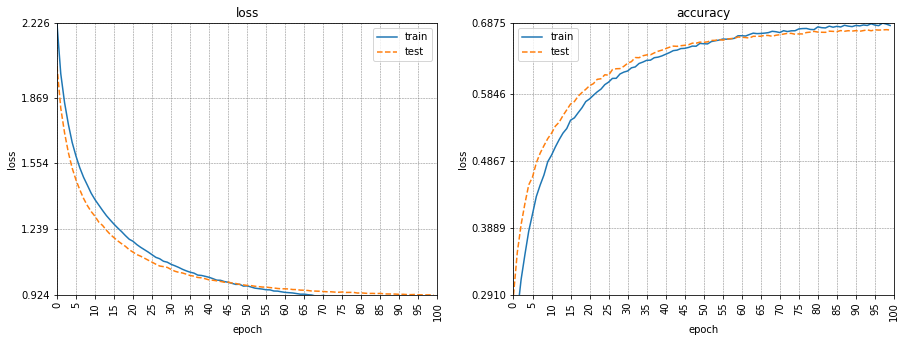

drawTrainProcess... Done


In [69]:
from utils.outputs import ModelOuputHelper
import tensorflow as tf
import numpy as np


# __pltOnePlot(title='test-plot' ,pos=(1,2,1),plotDatas =
# [
#     [np.arange(0, 20) ,'-']
# ])
drawTrainProcess(r)
